In [1]:
import pandas as pd 
from os import path
import numpy as np 
import nltk 
import sklearn 
from PIL import Image
from wordcloud import WordCloud,STOPWORDS
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.feature_extraction.text import CountVectorizer 
from nltk.corpus import stopwords 
import re 
from string import punctuation 
from collections import Counter 
import itertools

import pandas as pd
import numpy as np
import nltk
import sklearn
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords
import re
from string import punctuation
from collections import Counter
import itertools

In [35]:
df_ot = pd.read_csv("original_tweets.csv", lineterminator='\n')

In [36]:
def remove_punct(text):
    text_nopunct = "".join([char for char in text if char not in punctuation])
    return(text_nopunct)

df_ot['cleaned_full_text'] = df_ot['full_text'].apply(lambda x: remove_punct(x))


In [37]:
def tokenize(text):
    tokens = re.split('\W+', text)
    return tokens

df_ot['cleaned_full_text'] = df_ot['cleaned_full_text'].apply(lambda x: tokenize(x.lower()))

In [38]:
words = []
for tweet in df_ot['cleaned_full_text']:
    for w in tweet:
        words.append(w)

In [96]:
stopwords.add('amp')

In [97]:
words2 = words[:100000]
words2 = [w for w in words2 if w not in stopwords]
i = 0
bstring = words2[0]
while i < len(words2) - 1:
    bstring = bstring + ' ' + words2[i + 1]
    i += 1
    

In [98]:
bstring

'2016 remember peterdutton found guilty breaching duty care asylumseeker punishment dickson httpstcos1q9ufwxci httpstcohvnraaoghz auspol lnp nswpol springst qldpol banas51 nobby15 randlight lnpmemes shayneneumannmp httpstcop3xocohkgo pains time compromise australias cruel asylumseeker policy robertmanne httpstcoruzkjux1ce well paid jobs hasn t started large beyond average joe wages family man wanna start showing release every woman child family asylumseeker detention s alp guna show true gough whitlam humanity httpstcokbz9ykhttv must read analysis policy paralysis asylum seekers robert manne pains time compromise australias cruel asylumseeker policy auspol guardianaus auslaw httpstcorat06o9cct frfrankbrennan timcostello johnmenadue halyapuff ukrainian prosecutor general admits asylumseeker fought ukraine donbas forcibly returned russia mistake tumgoev тумгоев httpstcoovsapxmyfu httpstcoovsapxmyfu ukrainian prosecutor general admits asylumseeker fought ukraine donbas forcibly returned r

In [ ]:
words2 

In [99]:
alice_mask = np.array(Image.open("alice_mask.png"))

In [100]:
with open("text.txt", "w") as output:
    output.write(str(bstring))

In [101]:
text = open('text.txt').read()
text.replace(',/[/]', '')

'2016 remember peterdutton found guilty breaching duty care asylumseeker punishment dickson httpstcos1q9ufwxci httpstcohvnraaoghz auspol lnp nswpol springst qldpol banas51 nobby15 randlight lnpmemes shayneneumannmp httpstcop3xocohkgo pains time compromise australias cruel asylumseeker policy robertmanne httpstcoruzkjux1ce well paid jobs hasn t started large beyond average joe wages family man wanna start showing release every woman child family asylumseeker detention s alp guna show true gough whitlam humanity httpstcokbz9ykhttv must read analysis policy paralysis asylum seekers robert manne pains time compromise australias cruel asylumseeker policy auspol guardianaus auslaw httpstcorat06o9cct frfrankbrennan timcostello johnmenadue halyapuff ukrainian prosecutor general admits asylumseeker fought ukraine donbas forcibly returned russia mistake tumgoev тумгоев httpstcoovsapxmyfu httpstcoovsapxmyfu ukrainian prosecutor general admits asylumseeker fought ukraine donbas forcibly returned r

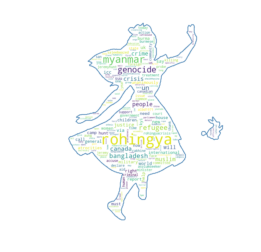

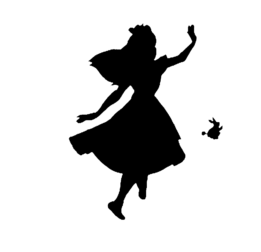

In [107]:
wc = WordCloud(collocations = False, background_color = 'white', mask = alice_mask, stopwords = stopwords, contour_width = 3, contour_color = 'steelblue')
wc.generate(text)
plt.imshow(wc, interpolation = 'bilinear')
plt.axis('off')
plt.figure()
plt.imshow(alice_mask, cmap = plt.cm.gray, interpolation = 'bilinear')
plt.axis('off')
plt.show();

In [108]:
wc.to_file('alice.png')

In [69]:
text

"['2016', 'remember', 'peterdutton', 'found', 'guilty', 'breaching', 'duty', 'care', 'asylumseeker', 'punishment', 'dickson', 'httpstcos1q9ufwxci', 'httpstcohvnraaoghz', 'auspol', 'lnp', 'nswpol', 'springst', 'qldpol', 'banas51', 'nobby15', 'randlight', 'lnpmemes', 'shayneneumannmp', 'httpstcop3xocohkgo', 'pains', 'time', 'compromise', 'australias', 'cruel', 'asylumseeker', 'policy', 'robertmanne', 'httpstcoruzkjux1ce', 'well', 'paid', 'jobs', 'hasn', 't', 'started', 'large', 'beyond', 'average', 'joe', 'wages', 'family', 'man', 'wanna', 'start', 'showing', 'release', 'every', 'woman', 'child', 'amp', 'family', 'asylumseeker', 'detention', 's', 'alp', 'guna', 'show', 'true', 'gough', 'whitlam', 'humanity', 'httpstcokbz9ykhttv', 'must', 'read', 'analysis', 'policy', 'paralysis', 'asylum', 'seekers', 'robert', 'manne', 'pains', 'time', 'compromise', 'australias', 'cruel', 'asylumseeker', 'policy', 'auspol', 'guardianaus', 'auslaw', 'httpstcorat06o9cct', 'frfrankbrennan', 'timcostello', '

In [34]:
alltext = df_ot['cleaned_full_text'].apply(lambda x: Counter(x))

,_id,created_at,favorite_count,full_text,retweet_count,u4u_dataset,user.created_at,user.description,user.followers_count,user.friends_count,user.lang,user.listed_count,user.location,user.name,user.screen_name,cleaned_full_text,word_freq
0,5bd86c7968a761d62501fda2,Sun Sep 23 15:01:52 +0000 2018,1,2016\nRemember when #PeterDutton was found gui...,0,asylumseeker,Wed Oct 02 00:18:21 +0000 2013,This page is sharing information about the Lib...,6490,5435,en,261,Western Australia,TALAOLP,Talaolp,"[2016, remember, when, peterdutton, was, found...","{'2016': 1, 'remember': 1, 'when': 1, 'peterdu..."
1,5bd86c7968a761d62501fda5,Sun Sep 23 11:09:04 +0000 2018,1,"This pains me, but it's time to compromise on ...",1,asylumseeker,Sat Nov 28 02:34:51 +0000 2009,"big fan of irreverent political commentary, c...",1966,3281,en,125,"country Victoria, Australia",eithne,eithne52,"[this, pains, me, but, its, time, to, compromi...","{'this': 1, 'pains': 1, 'me': 1, 'but': 1, 'it..."
2,5bd86c7968a761d62501fda9,Sun Sep 23 02:01:55 +0000 2018,7,What about all his other well paid jobs! He ha...,2,asylumseeker,Mon Oct 22 07:25:28 +0000 2012,#Wiimpitja - black fella #BarkindjiNation #Kal...,8583,5514,en,358,NaN,Paul Dutton,pauldutton1968,"[what, about, all, his, other, well, paid, job...","{'what': 2, 'about': 1, 'all': 1, 'his': 1, 'o..."
3,5bd86c7968a761d62501fdab,Sun Sep 23 00:47:55 +0000 2018,2,A must read analysis of policy paralysis on as...,2,asylumseeker,Sat Aug 03 03:08:39 +0000 2013,"Senior Counsel, AWL Woman Lawyer of the Year, ...",5019,932,en,85,Australia,Fi McLeod SC,FiMcLeodSC,"[a, must, read, analysis, of, policy, paralysi...","{'a': 1, 'must': 1, 'read': 1, 'analysis': 1, ..."
4,5bd86c7968a761d62501fdaf,Sat Sep 22 02:49:45 +0000 2018,0,"""@halyapuff: #Ukrainian prosecutor general adm...",0,asylumseeker,Fri Feb 04 22:40:35 +0000 2011,NaN,2097,1853,en,83,THE MOON,Gaby Skittles friend,GABchaag10,"[halyapuff, ukrainian, prosecutor, general, ad...","{'halyapuff': 1, 'ukrainian': 1, 'prosecutor':..."


In [227]:
df_ot.columns

Index(['_id', 'created_at', 'favorite_count', 'full_text', 'retweet_count',
       'u4u_dataset', 'user.created_at', 'user.description',
       'user.followers_count', 'user.friends_count', 'user.lang',
       'user.listed_count', 'user.location', 'user.name', 'user.screen_name',
       'cleaned_full_text'],
      dtype='object')

In [228]:
df_ot_sorted = df_ot.sort_values(['user.followers_count'], ascending = False)

In [229]:
df_ot_sorted['index'] = pd.Series(np.arange(0, len(df_ot_sorted)))

In [252]:
df_ot_sorted.reset_index(drop = True, inplace = True)
df_ot_sorted.tail()

,_id,created_at,favorite_count,full_text,retweet_count,u4u_dataset,user.created_at,user.description,user.followers_count,user.friends_count,user.lang,user.listed_count,user.location,user.name,user.screen_name,cleaned_full_text,index
1011558,5bdb0fe868a761f5bf0e90fc,Mon Sep 24 13:16:00 +0000 2018,0,@realDonaldTrump one more thing we should not ...,0,immigrants,Mon Sep 24 12:42:24 +0000 2018,forced to retire,0,0,en,0,"Clearlake, CA",larry s broad,larrysbroad1,"[realdonaldtrump, one, more, thing, we, should...",741939
1011559,5bd86e8568a761d650c9ef3d,Thu Oct 04 15:44:19 +0000 2018,0,@pbhushan1 kuch to sharm kariye..Illegal Rohin...,0,rohingya,Fri Aug 24 05:37:48 +0000 2018,Alone but happy,0,11,en,0,"Surat, India",Vishal,Vishal09504066,"[pbhushan1, kuch, to, sharm, kariyeillegal, ro...",32894
1011560,5bd87fca68a761d876460711,Mon Oct 08 14:11:04 +0000 2018,2,@CraigCons So you won't have a problem giving ...,0,asylum,Thu Feb 22 11:13:14 +0000 2018,NaN,0,1,en,0,NaN,Rust Asylum,Rust_Asylum,"[craigcons, so, you, wont, have, a, problem, g...",266223
1011561,5bd8802c68a761d87646b0bd,Fri Oct 05 02:15:48 +0000 2018,5,@NBCNews North Korea ranks higher than the USA...,1,asylum,Thu Oct 04 02:43:55 +0000 2018,A concerned citizen of the world.,0,3,en,0,NaN,CitizenBen,CitizenBen4,"[nbcnews, north, korea, ranks, higher, than, t...",276662
1011562,5bdb154368a761f5bf16d9e7,Mon Oct 01 23:13:04 +0000 2018,0,"Retro Report: For Private Prisons, Detaining I...",0,immigrants,Tue Dec 05 19:07:55 +0000 2017,My blog covers many different subjects so i ho...,0,40,en,0,NaN,AVA News,kEwuBfkFNJy2SKx,"[retro, report, for, private, prisons, detaini...",859996


In [333]:
df_ot_cleaned = df_ot_sorted.iloc[:, :]
df_ot_cleaned.reset_index(drop=True, inplace=True)
df_ot_cleaned.tail()

,_id,created_at,favorite_count,full_text,retweet_count,u4u_dataset,user.created_at,user.description,user.followers_count,user.friends_count,user.lang,user.listed_count,user.location,user.name,user.screen_name,cleaned_full_text,index
1011558,5bdb0fe868a761f5bf0e90fc,Mon Sep 24 13:16:00 +0000 2018,0,@realDonaldTrump one more thing we should not ...,0,immigrants,Mon Sep 24 12:42:24 +0000 2018,forced to retire,0,0,en,0,"Clearlake, CA",larry s broad,larrysbroad1,"[realdonaldtrump, one, more, thing, we, should...",741939
1011559,5bd86e8568a761d650c9ef3d,Thu Oct 04 15:44:19 +0000 2018,0,@pbhushan1 kuch to sharm kariye..Illegal Rohin...,0,rohingya,Fri Aug 24 05:37:48 +0000 2018,Alone but happy,0,11,en,0,"Surat, India",Vishal,Vishal09504066,"[pbhushan1, kuch, to, sharm, kariyeillegal, ro...",32894
1011560,5bd87fca68a761d876460711,Mon Oct 08 14:11:04 +0000 2018,2,@CraigCons So you won't have a problem giving ...,0,asylum,Thu Feb 22 11:13:14 +0000 2018,NaN,0,1,en,0,NaN,Rust Asylum,Rust_Asylum,"[craigcons, so, you, wont, have, a, problem, g...",266223
1011561,5bd8802c68a761d87646b0bd,Fri Oct 05 02:15:48 +0000 2018,5,@NBCNews North Korea ranks higher than the USA...,1,asylum,Thu Oct 04 02:43:55 +0000 2018,A concerned citizen of the world.,0,3,en,0,NaN,CitizenBen,CitizenBen4,"[nbcnews, north, korea, ranks, higher, than, t...",276662
1011562,5bdb154368a761f5bf16d9e7,Mon Oct 01 23:13:04 +0000 2018,0,"Retro Report: For Private Prisons, Detaining I...",0,immigrants,Tue Dec 05 19:07:55 +0000 2017,My blog covers many different subjects so i ho...,0,40,en,0,NaN,AVA News,kEwuBfkFNJy2SKx,"[retro, report, for, private, prisons, detaini...",859996


In [109]:
pol = pd.read_table('vader_lexicon.txt', header=None).set_index(0).iloc[:,0]
d = {'polarity': pol}
sent = pd.DataFrame(data = d)
sent.head()

,polarity
0,
$:,-1.5
%),-0.4
%-),-1.5
&-:,-0.4
&:,-0.7


In [110]:
class CleanText():
    
    def __init__(self, input_text):
        self.input_text = input_text
    
    def remove(self):
        remove_mention = re.sub(r'@\w+', '', self.input_text)
        remove_url = re.sub(r'http.?://[^\s]+[\s]?', '', remove_mention)
        # By compressing the underscore, the emoji is kept as one word
        remove_emoji = remove_url.replace('_','')
        remove_punctuation = re.sub('[^A-Za-z0-9_\s]', '', remove_emoji)
        lowercase = remove_punctuation.lower()
        remove_n = re.sub('[\n\r]', '', lowercase)
        
        return remove_n.replace('rt', '')

In [111]:
clean_tweet = []
for tweet in df_ot['full_text']:
    clean_tweet.append(CleanText(tweet).remove())

In [113]:
clean_tweets = df_ot.drop(['full_text'], axis = 1)
clean_tweets['Clean_Text'] = clean_tweet
clean_tweets.head()

,_id,created_at,favorite_count,retweet_count,u4u_dataset,user.created_at,user.description,user.followers_count,user.friends_count,user.lang,user.listed_count,user.location,user.name,user.screen_name,cleaned_full_text,Clean_Text
0,5bd86c7968a761d62501fda2,Sun Sep 23 15:01:52 +0000 2018,1,0,asylumseeker,Wed Oct 02 00:18:21 +0000 2013,This page is sharing information about the Lib...,6490,5435,en,261,Western Australia,TALAOLP,Talaolp,"[2016, remember, when, peterdutton, was, found...",2016remember when peterdutton was found guilty...
1,5bd86c7968a761d62501fda5,Sun Sep 23 11:09:04 +0000 2018,1,1,asylumseeker,Sat Nov 28 02:34:51 +0000 2009,"big fan of irreverent political commentary, c...",1966,3281,en,125,"country Victoria, Australia",eithne,eithne52,"[this, pains, me, but, its, time, to, compromi...",this pains me but its time to compromise on au...
2,5bd86c7968a761d62501fda9,Sun Sep 23 02:01:55 +0000 2018,7,2,asylumseeker,Mon Oct 22 07:25:28 +0000 2012,#Wiimpitja - black fella #BarkindjiNation #Kal...,8583,5514,en,358,NaN,Paul Dutton,pauldutton1968,"[what, about, all, his, other, well, paid, job...",what about all his other well paid jobs he has...
3,5bd86c7968a761d62501fdab,Sun Sep 23 00:47:55 +0000 2018,2,2,asylumseeker,Sat Aug 03 03:08:39 +0000 2013,"Senior Counsel, AWL Woman Lawyer of the Year, ...",5019,932,en,85,Australia,Fi McLeod SC,FiMcLeodSC,"[a, must, read, analysis, of, policy, paralysi...",a must read analysis of policy paralysis on as...
4,5bd86c7968a761d62501fdaf,Sat Sep 22 02:49:45 +0000 2018,0,0,asylumseeker,Fri Feb 04 22:40:35 +0000 2011,NaN,2097,1853,en,83,THE MOON,Gaby Skittles friend,GABchaag10,"[halyapuff, ukrainian, prosecutor, general, ad...",ukrainian prosecutor general admits asylumsee...


In [114]:
d = list(clean_tweets['Clean_Text'].unique())
unique = pd.DataFrame(d)
unique.columns = ['Clean_Text']
unique.head()

,Clean_Text
0,2016remember when peterdutton was found guilty...
1,this pains me but its time to compromise on au...
2,what about all his other well paid jobs he has...
3,a must read analysis of policy paralysis on as...
4,ukrainian prosecutor general admits asylumsee...


In [115]:
tidy = pd.DataFrame(unique['Clean_Text'].str.split(expand = True).stack().reset_index(level=1,))
tidy.columns = ['num', 'word']
tidy.head()

,num,word
0,0,2016remember
0,1,when
0,2,peterdutton
0,3,was
0,4,found


In [116]:
sent.reset_index(level=0, inplace=True)

In [117]:
sent.columns = ['word', 'polarity']

In [118]:
polarity = pd.merge(tidy.reset_index(level = -1), sent, on = 'word').groupby('index')[['polarity']].sum()
polarity.head()

,polarity
index,
0,-4.0
1,-4.6
2,2.9
3,-4.6
4,-0.1


In [119]:
clean_tweets['polarity'] = polarity['polarity']
clean_tweets['polarity'] = clean_tweets['polarity'].replace(np.float64('nan'), 0)

In [120]:
np.mean(clean_tweets['polarity'])

-0.4433313594901662

In [121]:
clean_tweets.head()

,_id,created_at,favorite_count,retweet_count,u4u_dataset,user.created_at,user.description,user.followers_count,user.friends_count,user.lang,user.listed_count,user.location,user.name,user.screen_name,cleaned_full_text,Clean_Text,polarity
0,5bd86c7968a761d62501fda2,Sun Sep 23 15:01:52 +0000 2018,1,0,asylumseeker,Wed Oct 02 00:18:21 +0000 2013,This page is sharing information about the Lib...,6490,5435,en,261,Western Australia,TALAOLP,Talaolp,"[2016, remember, when, peterdutton, was, found...",2016remember when peterdutton was found guilty...,-4.0
1,5bd86c7968a761d62501fda5,Sun Sep 23 11:09:04 +0000 2018,1,1,asylumseeker,Sat Nov 28 02:34:51 +0000 2009,"big fan of irreverent political commentary, c...",1966,3281,en,125,"country Victoria, Australia",eithne,eithne52,"[this, pains, me, but, its, time, to, compromi...",this pains me but its time to compromise on au...,-4.6
2,5bd86c7968a761d62501fda9,Sun Sep 23 02:01:55 +0000 2018,7,2,asylumseeker,Mon Oct 22 07:25:28 +0000 2012,#Wiimpitja - black fella #BarkindjiNation #Kal...,8583,5514,en,358,NaN,Paul Dutton,pauldutton1968,"[what, about, all, his, other, well, paid, job...",what about all his other well paid jobs he has...,2.9
3,5bd86c7968a761d62501fdab,Sun Sep 23 00:47:55 +0000 2018,2,2,asylumseeker,Sat Aug 03 03:08:39 +0000 2013,"Senior Counsel, AWL Woman Lawyer of the Year, ...",5019,932,en,85,Australia,Fi McLeod SC,FiMcLeodSC,"[a, must, read, analysis, of, policy, paralysi...",a must read analysis of policy paralysis on as...,-4.6
4,5bd86c7968a761d62501fdaf,Sat Sep 22 02:49:45 +0000 2018,0,0,asylumseeker,Fri Feb 04 22:40:35 +0000 2011,NaN,2097,1853,en,83,THE MOON,Gaby Skittles friend,GABchaag10,"[halyapuff, ukrainian, prosecutor, general, ad...",ukrainian prosecutor general admits asylumsee...,-0.1


In [122]:
df_ot.columns

Index(['_id', 'created_at', 'favorite_count', 'full_text', 'retweet_count',
       'u4u_dataset', 'user.created_at', 'user.description',
       'user.followers_count', 'user.friends_count', 'user.lang',
       'user.listed_count', 'user.location', 'user.name', 'user.screen_name',
       'cleaned_full_text'],
      dtype='object')

In [145]:
df_ot_short = clean_tweets.loc[0:100000, :]

In [146]:
df_ot_short['date'] = pd.to_datetime(df_ot_short['created_at'])

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [147]:
df_ot_short['date'] = df_ot_short['date'].dt.date

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [148]:
df_ot_short.head()

,_id,created_at,favorite_count,retweet_count,u4u_dataset,user.created_at,user.description,user.followers_count,user.friends_count,user.lang,user.listed_count,user.location,user.name,user.screen_name,cleaned_full_text,Clean_Text,polarity,date
0,5bd86c7968a761d62501fda2,Sun Sep 23 15:01:52 +0000 2018,1,0,asylumseeker,Wed Oct 02 00:18:21 +0000 2013,This page is sharing information about the Lib...,6490,5435,en,261,Western Australia,TALAOLP,Talaolp,"[2016, remember, when, peterdutton, was, found...",2016remember when peterdutton was found guilty...,-4.0,2018-09-23
1,5bd86c7968a761d62501fda5,Sun Sep 23 11:09:04 +0000 2018,1,1,asylumseeker,Sat Nov 28 02:34:51 +0000 2009,"big fan of irreverent political commentary, c...",1966,3281,en,125,"country Victoria, Australia",eithne,eithne52,"[this, pains, me, but, its, time, to, compromi...",this pains me but its time to compromise on au...,-4.6,2018-09-23
2,5bd86c7968a761d62501fda9,Sun Sep 23 02:01:55 +0000 2018,7,2,asylumseeker,Mon Oct 22 07:25:28 +0000 2012,#Wiimpitja - black fella #BarkindjiNation #Kal...,8583,5514,en,358,NaN,Paul Dutton,pauldutton1968,"[what, about, all, his, other, well, paid, job...",what about all his other well paid jobs he has...,2.9,2018-09-23
3,5bd86c7968a761d62501fdab,Sun Sep 23 00:47:55 +0000 2018,2,2,asylumseeker,Sat Aug 03 03:08:39 +0000 2013,"Senior Counsel, AWL Woman Lawyer of the Year, ...",5019,932,en,85,Australia,Fi McLeod SC,FiMcLeodSC,"[a, must, read, analysis, of, policy, paralysi...",a must read analysis of policy paralysis on as...,-4.6,2018-09-23
4,5bd86c7968a761d62501fdaf,Sat Sep 22 02:49:45 +0000 2018,0,0,asylumseeker,Fri Feb 04 22:40:35 +0000 2011,NaN,2097,1853,en,83,THE MOON,Gaby Skittles friend,GABchaag10,"[halyapuff, ukrainian, prosecutor, general, ad...",ukrainian prosecutor general admits asylumsee...,-0.1,2018-09-22


In [158]:
df_unweighted = df_ot_short.groupby('date', as_index= False).sum()

In [160]:
df_weighted = df_ot_short.groupby('date', as_index= False).mean()

In [162]:
df_weighted['total_user_followers_count'] = df_unweighted['user.followers_count']

In [169]:
for i in range(len(df_ot_short)):
    for r in range(len(df_weighted)):
        if df_ot_short.loc[i, 'date'] == df_unweighted.loc[r, 'date']:
            df_ot_short.loc[i, 'total_user_followers_count'] = df_unweighted.loc[r, 'user.followers_count']

/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


KeyboardInterrupt: 

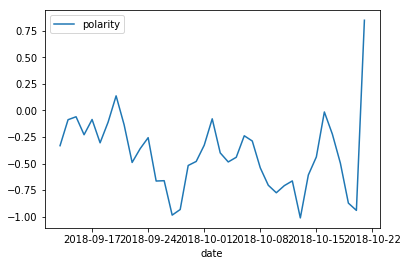

In [156]:
df_unweighted.plot(y = 'polarity', x = 'date')

In [16]:
helper = df_ot.loc[:10000, 'full_text']

In [396]:
helper.head()

,polarity,full_text
0,-3.5,2016\nRemember when #PeterDutton was found gui...
1,0.8,"This pains me, but it's time to compromise on ..."
2,3.0,What about all his other well paid jobs! He ha...
3,-1.2,A must read analysis of policy paralysis on as...
4,2.9,"""@halyapuff: #Ukrainian prosecutor general adm..."


In [17]:
bigstr = ''.join(helper['full_text'].tolist())

KeyError: 'full_text'

In [20]:
helper = helper.tolist()

In [23]:
bigstr = ''.join(helper)

In [8]:
"".join(small)

'abcd'

In [373]:
from scipy.signal import lfilter

n = 100  # the larger n is, the smoother curve will be
b = [1.0 / n] * n
a = 1
df_ot['polarity_smoothed'] = lfilter(b,a,df_ot['polarity'])

In [6]:
small = ['a', 'b', 'c', 'd']
smallstr = [''.join(word) for word in small]
print(smallstr) 

['a', 'b', 'c', 'd']


In [378]:
df_ot.loc[:5, 'date'].dt.date()

TypeError: 'Series' object is not callable

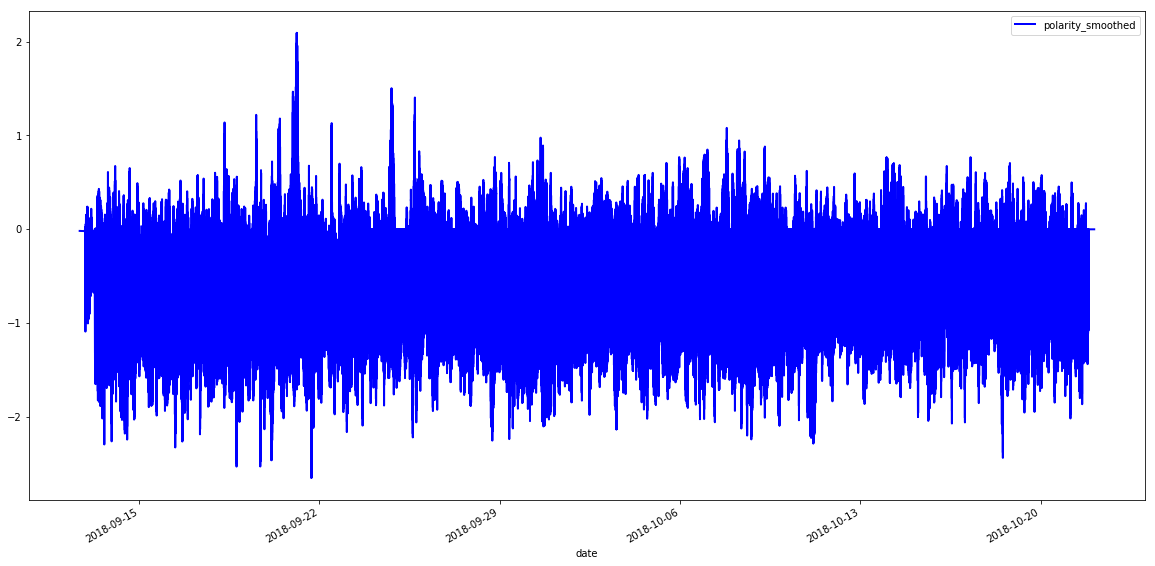

In [374]:
df_ot.plot(y = 'polarity_smoothed', x = 'date', linewidth=2, linestyle="-", c="b", figsize=(20,10))